In [21]:
import dosangstats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from scipy.spatial import ConvexHull

import numpy as np


# Get data:

In [2]:
# Upload all files from the text file folders_list with listed directories for analysis to the dictionary

folders_dict = dosangstats.get_folders_dict("/home/asya/Downloads/2017/folders_list")
csv_dict = dosangstats.get_csv_dict(folders_dict)

#tab2017 = 

# Temperature data from given file

weather_2017 = pd.read_csv("/home/asya/Documents/DOSANG/2017/2017_weather", delimiter='\t') ##encoding='cp1251'

In [3]:
d = {}
for t in csv_dict.keys():
  if 'paths' in csv_dict[t].keys():
    d[t] = dosangstats.complement_csv_points(t, csv_dict[t]['points'], csv_dict[t]['paths'])
  else:
    d[t] = dosangstats.complement_csv_points(t, csv_dict[t]['points'])
    
tab_points = pd.concat(d.values(), ignore_index=True)
days = range(min(tab_points.date.unique()), max(tab_points.date.unique())+1)



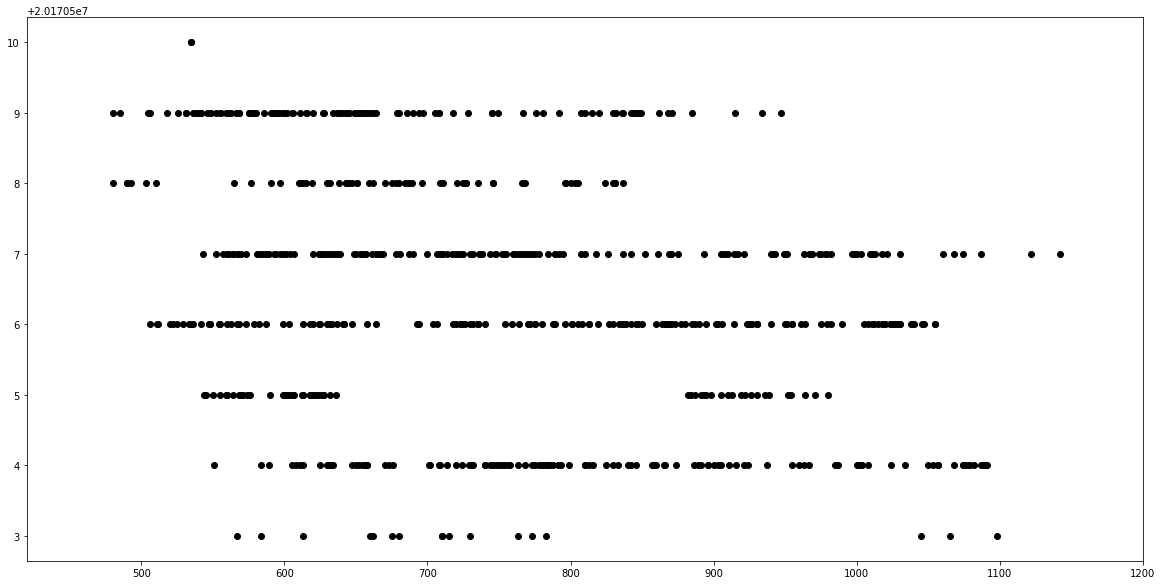

In [4]:
plt.figure(figsize=(20,10))
for dat in days:  
  dattab = tab_points.loc[tab_points['date']==dat]
  xxx = [dosangstats.time_to_minuts(x) for x in dattab['time1'] if str(x) != 'nan']
  plt.plot(xxx, [dat for i in range(len(xxx))], 'o', color='black')
  plt.xlim(7*60, 20*60)

plt.show()



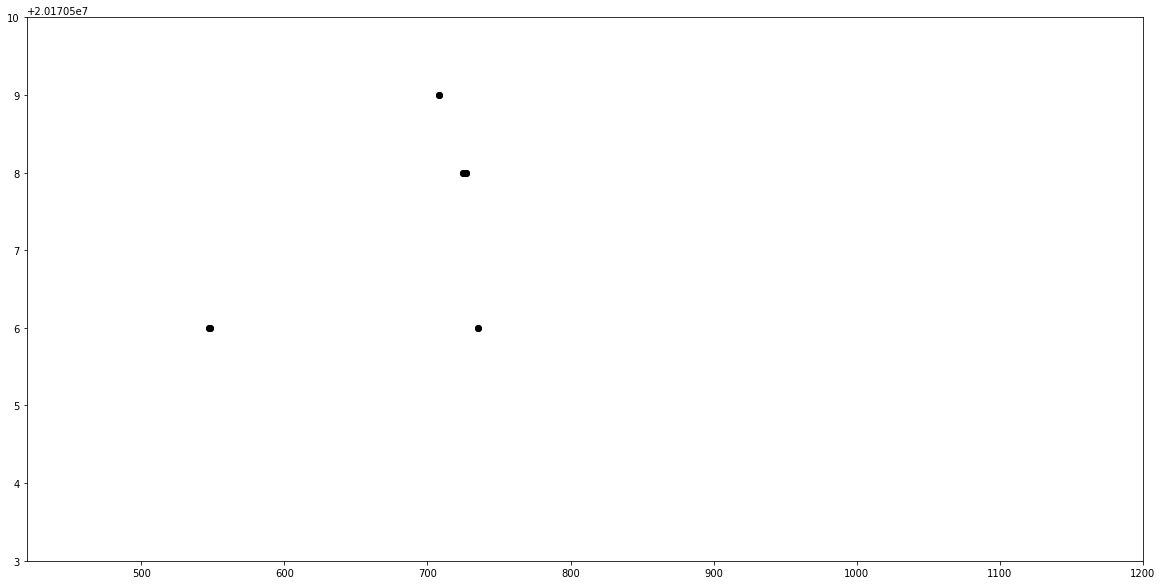

In [5]:
plt.figure(figsize=(20,10))
for dat in days:  
  dattab = tab_points.loc[tab_points['date']==dat].loc[tab_points['type']==2]
  xxx = [dosangstats.time_to_minuts(x) for x in dattab['time1'] if str(x) != 'nan']
  plt.plot(xxx, [dat for i in range(len(xxx))], 'o', color='black')
  plt.xlim(7*60, 20*60); plt.ylim(20170503, 20170510)

plt.show()

#tab_points.loc[tab_points['type']==2]

In [6]:
weather_tab = weather_2017.copy()
weather_tab['дата'] = [x.split('/')[2]+'050'+x.split('/')[1] for x in weather_2017['дата'][:-1]]+['20170510']
weather_tab['время'] = list(weather_tab['время'][0:2])+["".join(t.split(':')[0:2])+'00000' for t in weather_2017['время'] if str(t)!='nan']
weather_tab

,дата,время,воздух на выс 30 см,грунт на солнцепеке,густая тень,ветер,комментарий
0,20170502,NaN,NaN,NaN,NaN,NaN,не работали
1,20170503,NaN,NaN,NaN,NaN,слабый 5-7 м/с,"ясно, немного облаков. Разметка полигона"
2,20170504,93500000,34.1,40.8,29,слабый 2-3 м/с,"ясно, немного перистых облаков."
3,20170504,103000000,32.0,41.1,не измер,слабый 5 м/с,"ясно, немного перистых облаков."
4,20170504,113000000,38.3,49.0,33.5,слабый 2-3 м/с,"ясно, немного перистых облаков."
5,20170504,123000000,34.5,43.3,31.6,слабый 3-5 м/с,"ясно, немного перистых облаков."
6,20170504,134000000,34.4,50.1,30.1,слабый 3-5 м/с,"почти ясно, немного перистых облаков."
7,20170504,143000000,35.0,51.3,32,слабый 3 м/с,"ясно, немного перистых облаков."
8,20170504,153000000,34.0,42.7,28.8,слабый 3 м/с,"ясно, немного перистых облаков."
9,20170504,163000000,30.3,37.6,25.8,слабый 2-3 м/с,"ясно, немного перистых облаков."


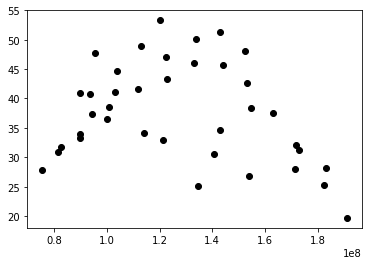

In [7]:
plt.plot(list(weather_tab[weather_tab.keys()[1]][2:-1]), list(weather_tab[weather_tab.keys()[3]][2:-1]), 'o', color='black')
plt.show()
#weather_tab

2017051008


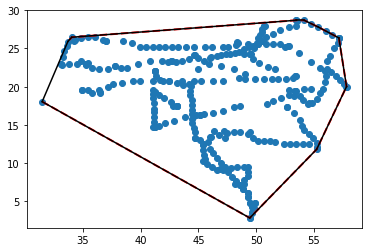

2017051009


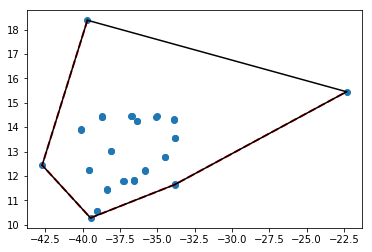

2017051028
2017051002


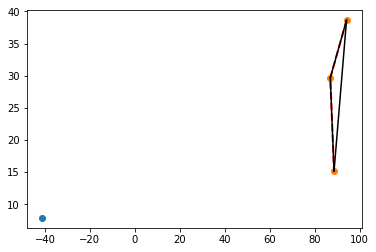

2017051003


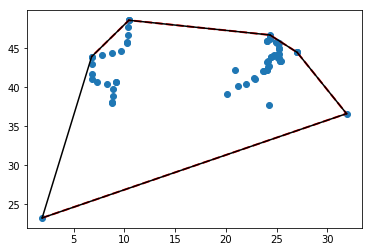

2017051001


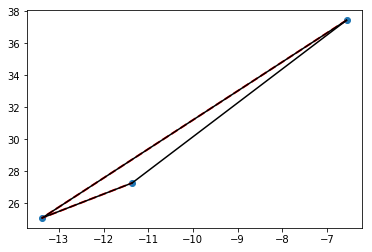

2017051006


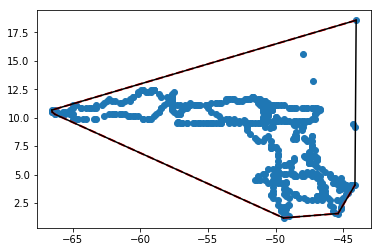

2017051007


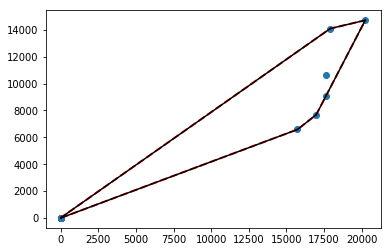

2017051004
2017051005


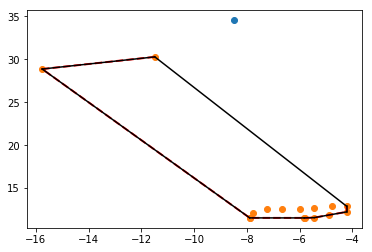

2017052050


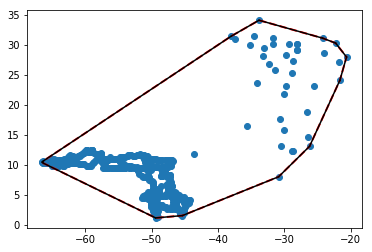

2017052051


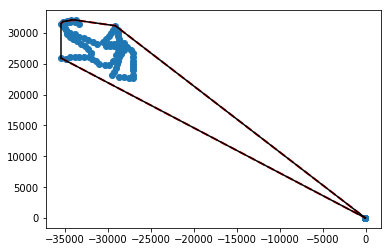

2017052052


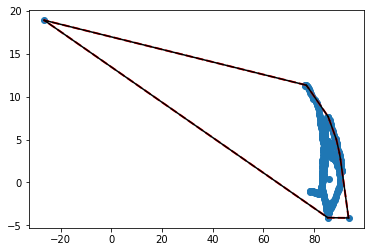

2017052053


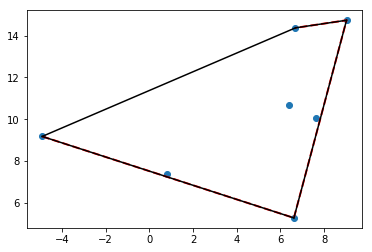

2017052054
2017052055


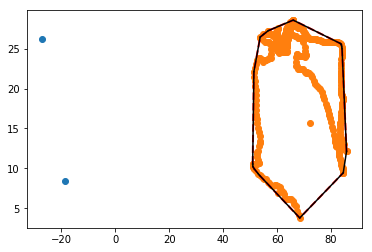

2017052058
2017050040


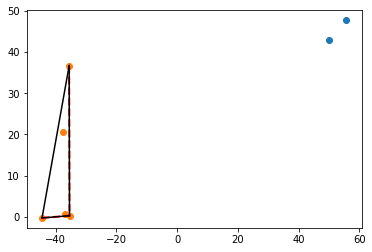

2017050042
2017051011


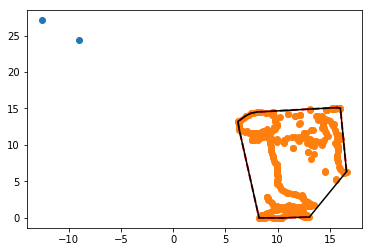

2017051010


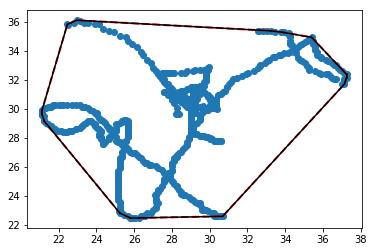

2017051013
2017051012


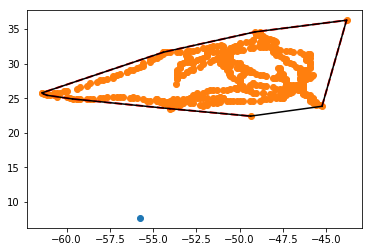

2017051015
2017051014
2017051017


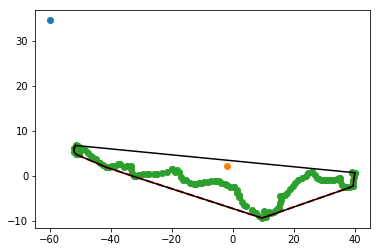

2017051016
2017050034


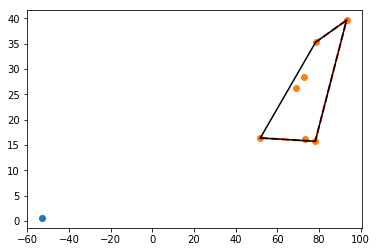

2017050035


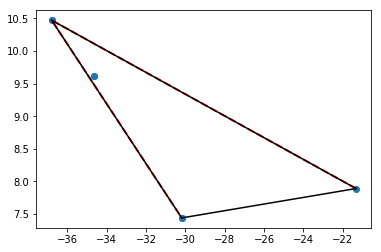

2017050036


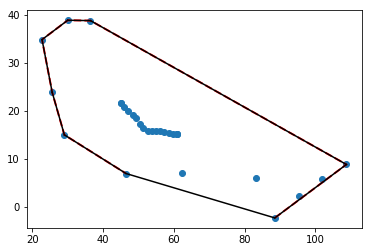

2017050037


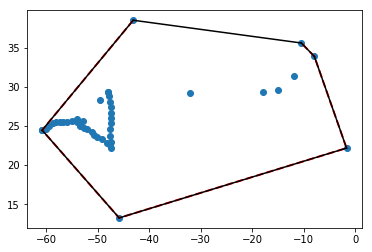

2017050030


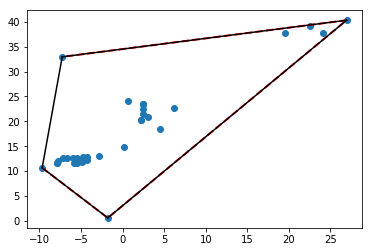

2017050031


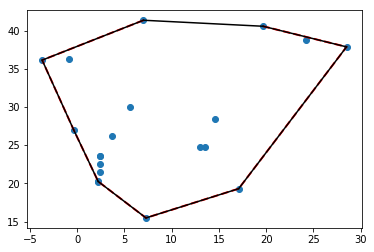

2017050032


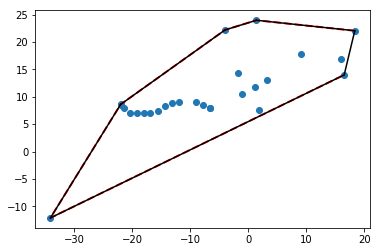

2017050033


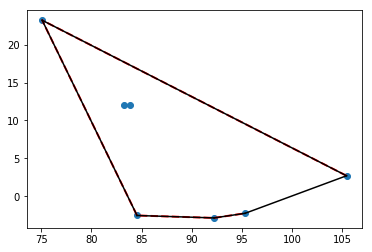

2017050038


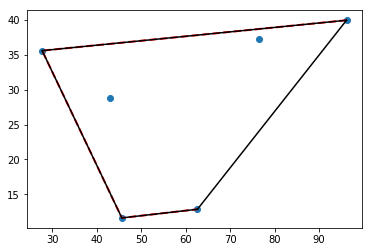

2017050039


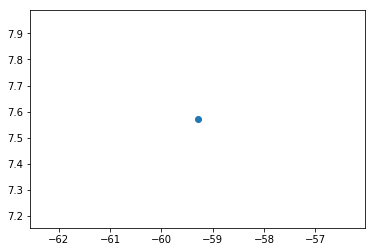

In [8]:
for item in csv_dict:
    print(item)
    dosangstats.ConvexHull_sq(csv_dict[item])
plt.show()

In [ ]:
plt.plot(res.coord_X, res.coord_Y, 'o')
    if len(res) <= 2: return 0
    
    hull = ConvexHull(res)
    #print(len(hull.points))
    #print(hull.vertices)
    #for hv in hull.vertices: print(res.coord_X[hv], res.coord_Y[hv])
    plt.plot(res.coord_X[hull.vertices], res.coord_Y[hull.vertices], 'r--', lw=2)
    #plt.ylim([-50,50])
    #plt.xlim([-50,50])
    
    for simplex in hull.simplices:
        plt.plot(res.coord_X[simplex], res.coord_Y[simplex], 'k-')
    plt.show()

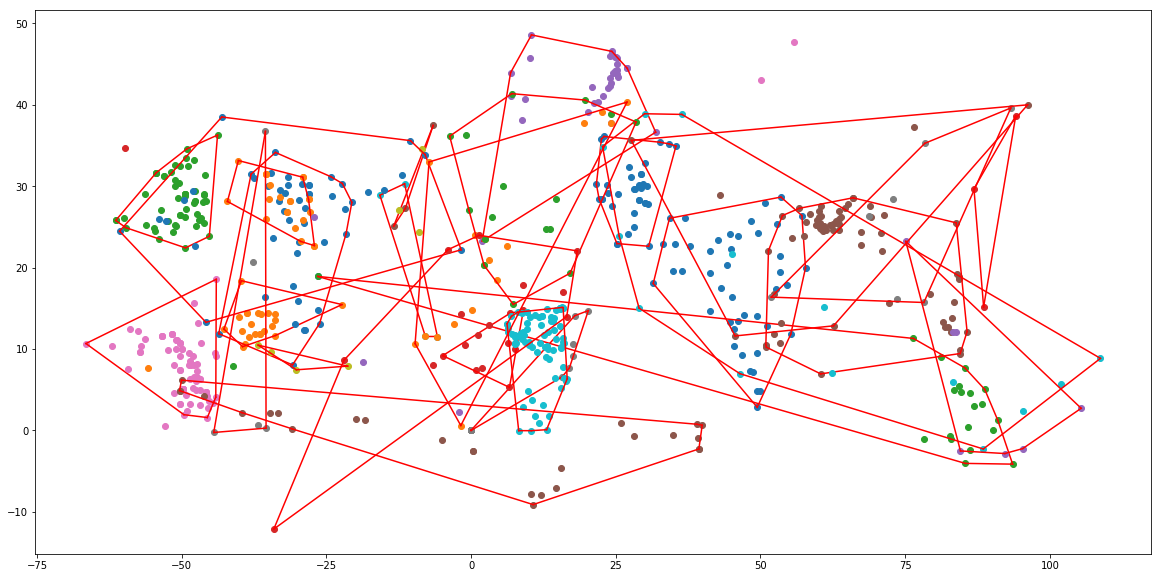

In [47]:
plt.figure(figsize=(20,10))
for item in tab_points.IN.unique():
  subtab = tab_points.loc[tab_points['IN']==item][['coord_X', 'coord_Y']]
  if item=='2017051007':
    subtab.coord_X = [xx/1000 for xx in subtab.coord_X]
    subtab.coord_Y = [yy/1000 for yy in subtab.coord_Y]
  plt.plot(subtab.coord_X, subtab.coord_Y, 'o')
  subtab = subtab.dropna()
  if len(subtab) <= 2: continue
  hull = ConvexHull(subtab)
  for simplex in hull.simplices:
        plt.plot(subtab.coord_X[subtab.index[simplex]], subtab.coord_Y[subtab.index[simplex]], 'r-')
  #plt.plot(subtab.coord_X[hull.vertices], subtab.coord_Y[hull.vertices], 'r--', lw=2)
plt.show()